In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Hebreus_1 = "God, who at sundry times and in divers manners spoke in time past to the fathers by the prophets,Has in these last days spoken to us by his Son, whom he has appointed heir of all things, by whom also he made the worlds;Who being the brightness of his glory, and the express image of his person, and upholding all things by the word of his power, when he had by himself purged our sins, sat down on the right hand of the Majesty on high:Being made so much better than the angels, as he has by inheritance obtained a more excellent name than they.For to which of the angels said he at any time, You are my Son, this day have I begotten you? And again, I will be to him a Father, and he shall be to me a Son?And again, when he brings in the first-begotten into the world, he said, And let all the angels of God worship him.And of the angels he said, Who makes his angels spirits, and his ministers a flame of fire.But to the Son he said, Your throne, O God, is for ever and ever: a scepter of righteousness is the scepter of your kingdom.You have loved righteousness, and hated iniquity; therefore God, even your God, has anointed you with the oil of gladness above your fellows.And, You, Lord, in the beginning have laid the foundation of the earth; and the heavens are the works of your hands:They shall perish; but you remain; and they all shall wax old as does a garment;And as a clothing shall you fold them up, and they shall be changed: but you are the same, and your years shall not fail.But to which of the angels said he at any time, Sit on my right hand, until I make your enemies your footstool?Are they not all ministering spirits, sent forth to minister for them who shall be heirs of salvation?".lower()

In [6]:
Hebreus_2 = "Therefore we ought to give the more earnest heed to the things which we have heard, lest at any time we should let them slip.For if the word spoken by angels was steadfast, and every transgression and disobedience received a just recompense of reward;How shall we escape, if we neglect so great salvation; which at the first began to be spoken by the Lord, and was confirmed to us by them that heard him;God also bearing them witness, both with signs and wonders, and with divers miracles, and gifts of the Holy Ghost, according to his own will?For to the angels has he not put in subjection the world to come, whereof we speak.But one in a certain place testified, saying, What is man, that you are mindful of him? or the son of man that you visit him?You made him a little lower than the angels; you crowned him with glory and honor, and did set him over the works of your hands:You have put all things in subjection under his feet. For in that he put all in subjection under him, he left nothing that is not put under him. But now we see not yet all things put under him.But we see Jesus, who was made a little lower than the angels for the suffering of death, crowned with glory and honor; that he by the grace of God should taste death for every man.For it became him, for whom are all things, and by whom are all things, in bringing many sons to glory, to make the captain of their salvation perfect through sufferings.For both he that sanctifies and they who are sanctified are all of one: for which cause he is not ashamed to call them brothers,Saying, I will declare your name to my brothers, in the middle of the church will I sing praise to you.And again, I will put my trust in him. And again, Behold I and the children which God has given me.For as much then as the children are partakers of flesh and blood, he also himself likewise took part of the same; that through death he might destroy him that had the power of death, that is, the devil;And deliver them who through fear of death were all their lifetime subject to bondage.For truly he took not on him the nature of angels; but he took on him the seed of Abraham.Why in all things it behooved him to be made like to his brothers, that he might be a merciful and faithful high priest in things pertaining to God, to make reconciliation for the sins of the people.For in that he himself has suffered being tempted, he is able to succor them that are tempted.".lower()

In [7]:
Hebreus_3 = "Why, holy brothers, partakers of the heavenly calling, consider the Apostle and High Priest of our profession, Christ Jesus;Who was faithful to him that appointed him, as also Moses was faithful in all his house.For this man was counted worthy of more glory than Moses, inasmuch as he who has built the house has more honor than the house.For every house is built by some man; but he that built all things is God.And Moses truly was faithful in all his house, as a servant, for a testimony of those things which were to be spoken after;But Christ as a son over his own house; whose house are we, if we hold fast the confidence and the rejoicing of the hope firm to the end.Why (as the Holy Ghost said, To day if you will hear his voice,Harden not your hearts, as in the provocation, in the day of temptation in the wilderness:When your fathers tempted me, proved me, and saw my works forty years.Why I was grieved with that generation, and said, They do always err in their heart; and they have not known my ways.So I swore in my wrath, They shall not enter into my rest.)Take heed, brothers, lest there be in any of you an evil heart of unbelief, in departing from the living God.But exhort one another daily, while it is called To day; lest any of you be hardened through the deceitfulness of sin.For we are made partakers of Christ, if we hold the beginning of our confidence steadfast to the end;While it is said, To day if you will hear his voice, harden not your hearts, as in the provocation.For some, when they had heard, did provoke: however, not all that came out of Egypt by Moses.But with whom was he grieved forty years? was it not with them that had sinned, whose carcasses fell in the wilderness?And to whom swore he that they should not enter into his rest, but to them that believed not?So we see that they could not enter in because of unbelief.".lower()

In [8]:
Hebreus_4 = "Let us therefore fear, lest, a promise being left us of entering into his rest, any of you should seem to come short of it.For to us was the gospel preached, as well as to them: but the word preached did not profit them, not being mixed with faith in them that heard it.For we which have believed do enter into rest, as he said, As I have sworn in my wrath, if they shall enter into my rest: although the works were finished from the foundation of the world.For he spoke in a certain place of the seventh day on this wise, And God did rest the seventh day from all his works.And in this place again, If they shall enter into my rest.Seeing therefore it remains that some must enter therein, and they to whom it was first preached entered not in because of unbelief:Again, he limits a certain day, saying in David, To day, after so long a time; as it is said, To day if you will hear his voice, harden not your hearts.For if Jesus had given them rest, then would he not afterward have spoken of another day.There remains therefore a rest to the people of God.For he that is entered into his rest, he also has ceased from his own works, as God did from his.Let us labor therefore to enter into that rest, lest any man fall after the same example of unbelief.For the word of God is quick, and powerful, and sharper than any two edged sword, piercing even to the dividing asunder of soul and spirit, and of the joints and marrow, and is a discerner of the thoughts and intents of the heart.Neither is there any creature that is not manifest in his sight: but all things are naked and opened to the eyes of him with whom we have to do.Seeing then that we have a great high priest, that is passed into the heavens, Jesus the Son of God, let us hold fast our profession.For we have not an high priest which cannot be touched with the feeling of our infirmities; but was in all points tempted like as we are, yet without sin.Let us therefore come boldly to the throne of grace, that we may obtain mercy, and find grace to help in time of need.".lower()

In [9]:
Hebreus_5 = "For every high priest taken from among men is ordained for men in things pertaining to God, that he may offer both gifts and sacrifices for sins:Who can have compassion on the ignorant, and on them that are out of the way; for that he himself also is compassed with infirmity.And by reason hereof he ought, as for the people, so also for himself, to offer for sins.And no man takes this honor to himself, but he that is called of God, as was Aaron.So also Christ glorified not himself to be made an high priest; but he that said to him, You are my Son, to day have I begotten you.As he said also in another place, You are a priest for ever after the order of Melchisedec.Who in the days of his flesh, when he had offered up prayers and supplications with strong crying and tears to him that was able to save him from death, and was heard in that he feared;Though he were a Son, yet learned he obedience by the things which he suffered;And being made perfect, he became the author of eternal salvation to all them that obey him;Called of God an high priest after the order of Melchisedec.Of whom we have many things to say, and hard to be uttered, seeing you are dull of hearing.For when for the time you ought to be teachers, you have need that one teach you again which be the first principles of the oracles of God; and are become such as have need of milk, and not of strong meat.For every one that uses milk is unskillful in the word of righteousness: for he is a babe.But strong meat belongs to them that are of full age, even those who by reason of use have their senses exercised to discern both good and evil.".lower()

In [10]:
Hebreus_6 = "Therefore leaving the principles of the doctrine of Christ, let us go on to perfection; not laying again the foundation of repentance from dead works, and of faith toward God,Of the doctrine of baptisms, and of laying on of hands, and of resurrection of the dead, and of eternal judgment.And this will we do, if God permit.For it is impossible for those who were once enlightened, and have tasted of the heavenly gift, and were made partakers of the Holy Ghost,And have tasted the good word of God, and the powers of the world to come,If they shall fall away, to renew them again to repentance; seeing they crucify to themselves the Son of God afresh, and put him to an open shame.For the earth which drinks in the rain that comes oft on it, and brings forth herbs meet for them by whom it is dressed, receives blessing from God:But that which bears thorns and briers is rejected, and is near to cursing; whose end is to be burned.But, beloved, we are persuaded better things of you, and things that accompany salvation, though we thus speak.For God is not unrighteous to forget your work and labor of love, which you have showed toward his name, in that you have ministered to the saints, and do minister.And we desire that every one of you do show the same diligence to the full assurance of hope to the end:That you be not slothful, but followers of them who through faith and patience inherit the promises.For when God made promise to Abraham, because he could swear by no greater, he swore by himself,Saying, Surely blessing I will bless you, and multiplying I will multiply you.And so, after he had patiently endured, he obtained the promise.For men truly swear by the greater: and an oath for confirmation is to them an end of all strife.Wherein God, willing more abundantly to show to the heirs of promise the immutability of his counsel, confirmed it by an oath:That by two immutable things, in which it was impossible for God to lie, we might have a strong consolation, who have fled for refuge to lay hold on the hope set before us:Which hope we have as an anchor of the soul, both sure and steadfast, and which enters into that within the veil;Where the forerunner is for us entered, even Jesus, made an high priest for ever after the order of Melchisedec.".lower()

In [11]:
Hebreus_7 = "For this Melchisedec, king of Salem, priest of the most high God, who met Abraham returning from the slaughter of the kings, and blessed him;To whom also Abraham gave a tenth part of all; first being by interpretation King of righteousness, and after that also King of Salem, which is, King of peace;Without father, without mother, without descent, having neither beginning of days, nor end of life; but made like to the Son of God; stays a priest continually.Now consider how great this man was, to whom even the patriarch Abraham gave the tenth of the spoils.And truly they that are of the sons of Levi, who receive the office of the priesthood, have a commandment to take tithes of the people according to the law, that is, of their brothers, though they come out of the loins of Abraham:But he whose descent is not counted from them received tithes of Abraham, and blessed him that had the promises.And without all contradiction the less is blessed of the better.And here men that die receive tithes; but there he receives them, of whom it is witnessed that he lives.And as I may so say, Levi also, who receives tithes, paid tithes in Abraham.For he was yet in the loins of his father, when Melchisedec met him.If therefore perfection were by the Levitical priesthood, (for under it the people received the law,) what further need was there that another priest should rise after the order of Melchisedec, and not be called after the order of Aaron?For the priesthood being changed, there is made of necessity a change also of the law.For he of whom these things are spoken pertains to another tribe, of which no man gave attendance at the altar.For it is evident that our Lord sprang out of Juda; of which tribe Moses spoke nothing concerning priesthood.And it is yet far more evident: for that after the similitude of Melchisedec there rises another priest,Who is made, not after the law of a carnal commandment, but after the power of an endless life.For he testifies, You are a priest for ever after the order of Melchisedec.For there is truly a cancellation of the commandment going before for the weakness and unprofitableness thereof.For the law made nothing perfect, but the bringing in of a better hope did; by the which we draw near to God.And inasmuch as not without an oath he was made priest:(For those priests were made without an oath; but this with an oath by him that said to him, The Lord swore and will not repent, You are a priest for ever after the order of Melchisedec:)By so much was Jesus made a surety of a better testament.And they truly were many priests, because they were not suffered to continue by reason of death:But this man, because he continues ever, has an unchangeable priesthood.Why he is able also to save them to the uttermost that come to God by him, seeing he ever lives to make intercession for them.For such an high priest became us, who is holy, harmless, undefiled, separate from sinners, and made higher than the heavens;Who needs not daily, as those high priests, to offer up sacrifice, first for his own sins, and then for the people': for this he did once, when he offered up himself.For the law makes men high priests which have infirmity; but the word of the oath, which was since the law, makes the Son, who is consecrated for ever more.".lower()

In [12]:
Hebreus_8 = "Now of the things which we have spoken this is the sum: We have such an high priest, who is set on the right hand of the throne of the Majesty in the heavens;A minister of the sanctuary, and of the true tabernacle, which the Lord pitched, and not man.For every high priest is ordained to offer gifts and sacrifices: why it is of necessity that this man have somewhat also to offer.For if he were on earth, he should not be a priest, seeing that there are priests that offer gifts according to the law:Who serve to the example and shadow of heavenly things, as Moses was admonished of God when he was about to make the tabernacle: for, See, said he, that you make all things according to the pattern showed to you in the mount.But now has he obtained a more excellent ministry, by how much also he is the mediator of a better covenant, which was established on better promises.For if that first covenant had been faultless, then should no place have been sought for the second.For finding fault with them, he said, Behold, the days come, said the Lord, when I will make a new covenant with the house of Israel and with the house of Judah:Not according to the covenant that I made with their fathers in the day when I took them by the hand to lead them out of the land of Egypt; because they continued not in my covenant, and I regarded them not, said the Lord.For this is the covenant that I will make with the house of Israel after those days, said the Lord; I will put my laws into their mind, and write them in their hearts: and I will be to them a God, and they shall be to me a people:And they shall not teach every man his neighbor, and every man his brother, saying, Know the Lord: for all shall know me, from the least to the greatest.For I will be merciful to their unrighteousness, and their sins and their iniquities will I remember no more.In that he said, A new covenant, he has made the first old. Now that which decays and waxes old is ready to vanish away.".lower()

In [13]:
Hebreus_9 = "Then truly the first covenant had also ordinances of divine service, and a worldly sanctuary.For there was a tabernacle made; the first, wherein was the candlestick, and the table, and the show bread; which is called the sanctuary.And after the second veil, the tabernacle which is called the Holiest of all;Which had the golden censer, and the ark of the covenant overlaid round about with gold, wherein was the golden pot that had manna, and Aaron' rod that budded, and the tables of the covenant;And over it the cherubim of glory shadowing the mercy seat; of which we cannot now speak particularly.Now when these things were thus ordained, the priests went always into the first tabernacle, accomplishing the service of God.But into the second went the high priest alone once every year, not without blood, which he offered for himself, and for the errors of the people:The Holy Ghost this signifying, that the way into the holiest of all was not yet made manifest, while as the first tabernacle was yet standing:Which was a figure for the time then present, in which were offered both gifts and sacrifices, that could not make him that did the service perfect, as pertaining to the conscience;Which stood only in meats and drinks, and divers washings, and carnal ordinances, imposed on them until the time of reformation.But Christ being come an high priest of good things to come, by a greater and more perfect tabernacle, not made with hands, that is to say, not of this building;Neither by the blood of goats and calves, but by his own blood he entered in once into the holy place, having obtained eternal redemption for us.For if the blood of bulls and of goats, and the ashes of an heifer sprinkling the unclean, sanctifies to the purifying of the flesh:How much more shall the blood of Christ, who through the eternal Spirit offered himself without spot to God, purge your conscience from dead works to serve the living God?And for this cause he is the mediator of the new testament, that by means of death, for the redemption of the transgressions that were under the first testament, they which are called might receive the promise of eternal inheritance.For where a testament is, there must also of necessity be the death of the testator.For a testament is of force after men are dead: otherwise it is of no strength at all while the testator lives.Whereupon neither the first testament was dedicated without blood.For when Moses had spoken every precept to all the people according to the law, he took the blood of calves and of goats, with water, and scarlet wool, and hyssop, and sprinkled both the book, and all the people,Saying, This is the blood of the testament which God has enjoined to you.Moreover he sprinkled with blood both the tabernacle, and all the vessels of the ministry.And almost all things are by the law purged with blood; and without shedding of blood is no remission.It was therefore necessary that the patterns of things in the heavens should be purified with these; but the heavenly things themselves with better sacrifices than these.For Christ is not entered into the holy places made with hands, which are the figures of the true; but into heaven itself, now to appear in the presence of God for us:Nor yet that he should offer himself often, as the high priest enters into the holy place every year with blood of others;For then must he often have suffered since the foundation of the world: but now once in the end of the world has he appeared to put away sin by the sacrifice of himself.And as it is appointed to men once to die, but after this the judgment:So Christ was once offered to bear the sins of many; and to them that look for him shall he appear the second time without sin to salvation.".lower()

In [14]:
Hebreus_10 = "For the law having a shadow of good things to come, and not the very image of the things, can never with those sacrifices which they offered year by year continually make the comers thereunto perfect.For then would they not have ceased to be offered? because that the worshippers once purged should have had no more conscience of sins.But in those sacrifices there is a remembrance again made of sins every year.For it is not possible that the blood of bulls and of goats should take away sins.Why when he comes into the world, he said, Sacrifice and offering you would not, but a body have you prepared me:In burnt offerings and sacrifices for sin you have had no pleasure.Then said I, See, I come (in the volume of the book it is written of me,) to do your will, O God.Above when he said, Sacrifice and offering and burnt offerings and offering for sin you would not, neither had pleasure therein; which are offered by the law;Then said he, See, I come to do your will, O God. He takes away the first, that he may establish the second.By the which will we are sanctified through the offering of the body of Jesus Christ once for all.And every priest stands daily ministering and offering oftentimes the same sacrifices, which can never take away sins:But this man, after he had offered one sacrifice for sins for ever, sat down on the right hand of God;From now on expecting till his enemies be made his footstool.For by one offering he has perfected for ever them that are sanctified.Whereof the Holy Ghost also is a witness to us: for after that he had said before,This is the covenant that I will make with them after those days, said the Lord, I will put my laws into their hearts, and in their minds will I write them;And their sins and iniquities will I remember no more.Now where remission of these is, there is no more offering for sin.Having therefore, brothers, boldness to enter into the holiest by the blood of Jesus,By a new and living way, which he has consecrated for us, through the veil, that is to say, his flesh;And having an high priest over the house of God;Let us draw near with a true heart in full assurance of faith, having our hearts sprinkled from an evil conscience, and our bodies washed with pure water.Let us hold fast the profession of our faith without wavering; (for he is faithful that promised;)And let us consider one another to provoke to love and to good works:Not forsaking the assembling of ourselves together, as the manner of some is; but exhorting one another: and so much the more, as you see the day approaching.For if we sin willfully after that we have received the knowledge of the truth, there remains no more sacrifice for sins,But a certain fearful looking for of judgment and fiery indignation, which shall devour the adversaries.He that despised Moses'law died without mercy under two or three witnesses:Of how much sorer punishment, suppose you, shall he be thought worthy, who has trodden under foot the Son of God, and has counted the blood of the covenant, with which he was sanctified, an unholy thing, and has done despite to the Spirit of grace?For we know him that has said, Vengeance belongs to me, I will recompense, said the Lord. And again, The Lord shall judge his people.It is a fearful thing to fall into the hands of the living God.But call to remembrance the former days, in which, after you were illuminated, you endured a great fight of afflictions;Partly, whilst you were made a spectacle both by reproaches and afflictions; and partly, whilst you became companions of them that were so used.For you had compassion of me in my bonds, and took joyfully the spoiling of your goods, knowing in yourselves that you have in heaven a better and an enduring substance.Cast not away therefore your confidence, which has great recompense of reward.For you have need of patience, that, after you have done the will of God, you might receive the promise.For yet a little while, and he that shall come will come, and will not tarry.Now the just shall live by faith: but if any man draw back, my soul shall have no pleasure in him.But we are not of them who draw back to perdition; but of them that believe to the saving of the soul.".lower()

In [15]:
Hebreus_11 = "Now faith is the substance of things hoped for, the evidence of things not seen.For by it the elders obtained a good report.Through faith we understand that the worlds were framed by the word of God, so that things which are seen were not made of things which do appear.By faith Abel offered to God a more excellent sacrifice than Cain, by which he obtained witness that he was righteous, God testifying of his gifts: and by it he being dead yet speaks.By faith Enoch was translated that he should not see death; and was not found, because God had translated him: for before his translation he had this testimony, that he pleased God.But without faith it is impossible to please him: for he that comes to God must believe that he is, and that he is a rewarder of them that diligently seek him.By faith Noah, being warned of God of things not seen as yet, moved with fear, prepared an ark to the saving of his house; by the which he condemned the world, and became heir of the righteousness which is by faith.By faith Abraham, when he was called to go out into a place which he should after receive for an inheritance, obeyed; and he went out, not knowing where he went.By faith he sojourned in the land of promise, as in a strange country, dwelling in tabernacles with Isaac and Jacob, the heirs with him of the same promise:For he looked for a city which has foundations, whose builder and maker is God.Through faith also Sara herself received strength to conceive seed, and was delivered of a child when she was past age, because she judged him faithful who had promised.Therefore sprang there even of one, and him as good as dead, so many as the stars of the sky in multitude, and as the sand which is by the sea shore innumerable.These all died in faith, not having received the promises, but having seen them afar off, and were persuaded of them, and embraced them, and confessed that they were strangers and pilgrims on the earth.For they that say such things declare plainly that they seek a country.And truly, if they had been mindful of that country from where they came out, they might have had opportunity to have returned.But now they desire a better country, that is, an heavenly: why God is not ashamed to be called their God: for he has prepared for them a city.By faith Abraham, when he was tried, offered up Isaac: and he that had received the promises offered up his only begotten son,Of whom it was said, That in Isaac shall your seed be called:Accounting that God was able to raise him up, even from the dead; from where also he received him in a figure.By faith Isaac blessed Jacob and Esau concerning things to come.By faith Jacob, when he was a dying, blessed both the sons of Joseph; and worshipped, leaning on the top of his staff.By faith Joseph, when he died, made mention of the departing of the children of Israel; and gave commandment concerning his bones.By faith Moses, when he was born, was hid three months of his parents, because they saw he was a proper child; and they were not afraid of the king' commandment.By faith Moses, when he was come to years, refused to be called the son of Pharaoh' daughter;Choosing rather to suffer affliction with the people of God, than to enjoy the pleasures of sin for a season;Esteeming the reproach of Christ greater riches than the treasures in Egypt: for he had respect to the recompense of the reward.By faith he forsook Egypt, not fearing the wrath of the king: for he endured, as seeing him who is invisible.Through faith he kept the passover, and the sprinkling of blood, lest he that destroyed the firstborn should touch them.By faith they passed through the Red sea as by dry land: which the Egyptians assaying to do were drowned.By faith the walls of Jericho fell down, after they were compassed about seven days.By faith the harlot Rahab perished not with them that believed not, when she had received the spies with peace.And what shall I more say? for the time would fail me to tell of Gedeon, and of Barak, and of Samson, and of Jephthae; of David also, and Samuel, and of the prophets:Who through faith subdued kingdoms, worked righteousness, obtained promises, stopped the mouths of lions.Quenched the violence of fire, escaped the edge of the sword, out of weakness were made strong, waxed valiant in fight, turned to flight the armies of the aliens.Women received their dead raised to life again: and others were tortured, not accepting deliverance; that they might obtain a better resurrection:And others had trial of cruel mockings and scourgings, yes, moreover of bonds and imprisonment:They were stoned, they were sawn asunder, were tempted, were slain with the sword: they wandered about in sheepskins and goatskins; being destitute, afflicted, tormented;(Of whom the world was not worthy:) they wandered in deserts, and in mountains, and in dens and caves of the earth.And these all, having obtained a good report through faith, received not the promise:God having provided some better thing for us, that they without us should not be made perfect.".lower()

In [16]:
Hebreus_12 = "Why seeing we also are compassed about with so great a cloud of witnesses, let us lay aside every weight, and the sin which does so easily beset us, and let us run with patience the race that is set before us,Looking to Jesus the author and finisher of our faith; who for the joy that was set before him endured the cross, despising the shame, and is set down at the right hand of the throne of God.For consider him that endured such contradiction of sinners against himself, lest you be wearied and faint in your minds.You have not yet resisted to blood, striving against sin.And you have forgotten the exhortation which speaks to you as to children, My son, despise not you the chastening of the Lord, nor faint when you are rebuked of him:For whom the Lord loves he chastens, and whips every son whom he receives.If you endure chastening, God deals with you as with sons; for what son is he whom the father chastens not?But if you be without chastisement, whereof all are partakers, then are you bastards, and not sons.Furthermore we have had fathers of our flesh which corrected us, and we gave them reverence: shall we not much rather be in subjection to the Father of spirits, and live?For they truly for a few days chastened us after their own pleasure; but he for our profit, that we might be partakers of his holiness.Now no chastening for the present seems to be joyous, but grievous: nevertheless afterward it yields the peaceable fruit of righteousness to them which are exercised thereby.Why lift up the hands which hang down, and the feeble knees;And make straight paths for your feet, lest that which is lame be turned out of the way; but let it rather be healed.Follow peace with all men, and holiness, without which no man shall see the Lord:Looking diligently lest any man fail of the grace of God; lest any root of bitterness springing up trouble you, and thereby many be defiled;Lest there be any fornicator, or profane person, as Esau, who for one morsel of meat sold his birthright.For you know how that afterward, when he would have inherited the blessing, he was rejected: for he found no place of repentance, though he sought it carefully with tears.For you are not come to the mount that might be touched, and that burned with fire, nor to blackness, and darkness, and tempest,And the sound of a trumpet, and the voice of words; which voice they that heard entreated that the word should not be spoken to them any more:(For they could not endure that which was commanded, And if so much as a beast touch the mountain, it shall be stoned, or thrust through with a dart:And so terrible was the sight, that Moses said, I exceedingly fear and quake:)But you are come to mount Sion, and to the city of the living God, the heavenly Jerusalem, and to an innumerable company of angels,To the general assembly and church of the firstborn, which are written in heaven, and to God the Judge of all, and to the spirits of just men made perfect,And to Jesus the mediator of the new covenant, and to the blood of sprinkling, that speaks better things that that of Abel.See that you refuse not him that speaks. For if they escaped not who refused him that spoke on earth, much more shall not we escape, if we turn away from him that speaks from heaven:Whose voice then shook the earth: but now he has promised, saying, Yet once more I shake not the earth only, but also heaven.And this word, Yet once more, signifies the removing of those things that are shaken, as of things that are made, that those things which cannot be shaken may remain.Why we receiving a kingdom which cannot be moved, let us have grace, whereby we may serve God acceptably with reverence and godly fear:For our God is a consuming fire.".lower()

In [17]:
Hebreus_13 = "Let brotherly love continue.Be not forgetful to entertain strangers: for thereby some have entertained angels unawares.Remember them that are in bonds, as bound with them; and them which suffer adversity, as being yourselves also in the body.Marriage is honorable in all, and the bed undefiled: but fornicators and adulterers God will judge.Let your conversation be without covetousness; and be content with such things as you have: for he has said, I will never leave you, nor forsake you.So that we may boldly say, The Lord is my helper, and I will not fear what man shall do to me.Remember them which have the rule over you, who have spoken to you the word of God: whose faith follow, considering the end of their conversation.Jesus Christ the same yesterday, and to day, and for ever.Be not carried about with divers and strange doctrines. For it is a good thing that the heart be established with grace; not with meats, which have not profited them that have been occupied therein.We have an altar, whereof they have no right to eat which serve the tabernacle.For the bodies of those beasts, whose blood is brought into the sanctuary by the high priest for sin, are burned without the camp.Why Jesus also, that he might sanctify the people with his own blood, suffered without the gate.Let us go forth therefore to him without the camp, bearing his reproach.For here have we no continuing city, but we seek one to come.By him therefore let us offer the sacrifice of praise to God continually, that is, the fruit of our lips giving thanks to his name.But to do good and to communicate forget not: for with such sacrifices God is well pleased.Obey them that have the rule over you, and submit yourselves: for they watch for your souls, as they that must give account, that they may do it with joy, and not with grief: for that is unprofitable for you.Pray for us: for we trust we have a good conscience, in all things willing to live honestly.But I beseech you the rather to do this, that I may be restored to you the sooner.Now the God of peace, that brought again from the dead our Lord Jesus, that great shepherd of the sheep, through the blood of the everlasting covenant,Make you perfect in every good work to do his will, working in you that which is well pleasing in his sight, through Jesus Christ; to whom be glory for ever and ever. Amen.And I beseech you, brothers, suffer the word of exhortation: for I have written a letter to you in few words.Know you that our brother Timothy is set at liberty; with whom, if he come shortly, I will see you.Salute all them that have the rule over you, and all the saints. They of Italy salute you.Grace be with you all. Amen.".lower()

In [90]:
tokens = nltk.word_tokenize(Hebreus_13)

In [91]:
stop_words = set(stopwords.words('english'))

In [92]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [93]:
print(filtered_sentence1)

['let', 'brotherly', 'love', 'continue.be', 'forgetful', 'entertain', 'strangers', ':', 'thereby', 'entertained', 'angels', 'unawares.remember', 'bonds', ',', 'bound', ';', 'suffer', 'adversity', ',', 'also', 'body.marriage', 'honorable', ',', 'bed', 'undefiled', ':', 'fornicators', 'adulterers', 'god', 'judge.let', 'conversation', 'without', 'covetousness', ';', 'content', 'things', ':', 'said', ',', 'never', 'leave', ',', 'forsake', 'you.so', 'may', 'boldly', 'say', ',', 'lord', 'helper', ',', 'fear', 'man', 'shall', 'me.remember', 'rule', ',', 'spoken', 'word', 'god', ':', 'whose', 'faith', 'follow', ',', 'considering', 'end', 'conversation.jesus', 'christ', 'yesterday', ',', 'day', ',', 'ever.be', 'carried', 'divers', 'strange', 'doctrines', '.', 'good', 'thing', 'heart', 'established', 'grace', ';', 'meats', ',', 'profited', 'occupied', 'therein.we', 'altar', ',', 'whereof', 'right', 'eat', 'serve', 'tabernacle.for', 'bodies', 'beasts', ',', 'whose', 'blood', 'brought', 'sanctuary

In [94]:
data =np.array([["Hebreus_1", "'god', ',', 'sundry', 'times', 'divers', 'manners', 'spoke', 'time', 'past', 'fathers', 'prophets', ',', 'last', 'days', 'spoken', 'us', 'son', ',', 'appointed', 'heir', 'things', ',', 'also', 'made', 'worlds', ';', 'brightness', 'glory', ',', 'express', 'image', 'person', ',', 'upholding', 'things', 'word', 'power', ',', 'purged', 'sins', ',', 'sat', 'right', 'hand', 'majesty', 'high', ':', 'made', 'much', 'better', 'angels', ',', 'inheritance', 'obtained', 'excellent', 'name', 'they.for', 'angels', 'said', 'time', ',', 'son', ',', 'day', 'begotten', '?', ',', 'father', ',', 'shall', 'son', '?', ',', 'brings', 'first-begotten', 'world', ',', 'said', ',', 'let', 'angels', 'god', 'worship', 'him.and', 'angels', 'said', ',', 'makes', 'angels', 'spirits', ',', 'ministers', 'flame', 'fire.but', 'son', 'said', ',', 'throne', ',', 'god', ',', 'ever', 'ever', ':', 'scepter', 'righteousness', 'scepter', 'kingdom.you', 'loved', 'righteousness', ',', 'hated', 'iniquity', ';', 'therefore', 'god', ',', 'even', 'god', ',', 'anointed', 'oil', 'gladness', 'fellows.and', ',', ',', 'lord', ',', 'beginning', 'laid', 'foundation', 'earth', ';', 'heavens', 'works', 'hands', ':', 'shall', 'perish', ';', 'remain', ';', 'shall', 'wax', 'old', 'garment', ';', 'clothing', 'shall', 'fold', ',', 'shall', 'changed', ':', ',', 'years', 'shall', 'fail.but', 'angels', 'said', 'time', ',', 'sit', 'right', 'hand', ',', 'make', 'enemies', 'footstool', '?', 'ministering', 'spirits', ',', 'sent', 'forth', 'minister', 'shall', 'heirs', 'salvation', '?'"],
               ["Hebreus_2", "'therefore', 'ought', 'give', 'earnest', 'heed', 'things', 'heard', ',', 'lest', 'time', 'let', 'slip.for', 'word', 'spoken', 'angels', 'steadfast', ',', 'every', 'transgression', 'disobedience', 'received', 'recompense', 'reward', ';', 'shall', 'escape', ',', 'neglect', 'great', 'salvation', ';', 'first', 'began', 'spoken', 'lord', ',', 'confirmed', 'us', 'heard', ';', 'god', 'also', 'bearing', 'witness', ',', 'signs', 'wonders', ',', 'divers', 'miracles', ',', 'gifts', 'holy', 'ghost', ',', 'according', '?', 'angels', 'put', 'subjection', 'world', 'come', ',', 'whereof', 'speak.but', 'one', 'certain', 'place', 'testified', ',', 'saying', ',', 'man', ',', 'mindful', '?', 'son', 'man', 'visit', '?', 'made', 'little', 'lower', 'angels', ';', 'crowned', 'glory', 'honor', ',', 'set', 'works', 'hands', ':', 'put', 'things', 'subjection', 'feet', '.', 'put', 'subjection', ',', 'left', 'nothing', 'put', '.', 'see', 'yet', 'things', 'put', 'him.but', 'see', 'jesus', ',', 'made', 'little', 'lower', 'angels', 'suffering', 'death', ',', 'crowned', 'glory', 'honor', ';', 'grace', 'god', 'taste', 'death', 'every', 'man.for', 'became', ',', 'things', ',', 'things', ',', 'bringing', 'many', 'sons', 'glory', ',', 'make', 'captain', 'salvation', 'perfect', 'sufferings.for', 'sanctifies', 'sanctified', 'one', ':', 'cause', 'ashamed', 'call', 'brothers', ',', 'saying', ',', 'declare', 'name', 'brothers', ',', 'middle', 'church', 'sing', 'praise', 'you.and', ',', 'put', 'trust', '.', ',', 'behold', 'children', 'god', 'given', 'me.for', 'much', 'children', 'partakers', 'flesh', 'blood', ',', 'also', 'likewise', 'took', 'part', ';', 'death', 'might', 'destroy', 'power', 'death', ',', ',', 'devil', ';', 'deliver', 'fear', 'death', 'lifetime', 'subject', 'bondage.for', 'truly', 'took', 'nature', 'angels', ';', 'took', 'seed', 'abraham.why', 'things', 'behooved', 'made', 'like', 'brothers', ',', 'might', 'merciful', 'faithful', 'high', 'priest', 'things', 'pertaining', 'god', ',', 'make', 'reconciliation', 'sins', 'people.for', 'suffered', 'tempted', ',', 'able', 'succor', 'tempted', '.'"],
               ["Hebreus_3", "',', 'holy', 'brothers', ',', 'partakers', 'heavenly', 'calling', ',', 'consider', 'apostle', 'high', 'priest', 'profession', ',', 'christ', 'jesus', ';', 'faithful', 'appointed', ',', 'also', 'moses', 'faithful', 'house.for', 'man', 'counted', 'worthy', 'glory', 'moses', ',', 'inasmuch', 'built', 'house', 'honor', 'house.for', 'every', 'house', 'built', 'man', ';', 'built', 'things', 'god.and', 'moses', 'truly', 'faithful', 'house', ',', 'servant', ',', 'testimony', 'things', 'spoken', ';', 'christ', 'son', 'house', ';', 'whose', 'house', ',', 'hold', 'fast', 'confidence', 'rejoicing', 'hope', 'firm', 'end.why', '(', 'holy', 'ghost', 'said', ',', 'day', 'hear', 'voice', ',', 'harden', 'hearts', ',', 'provocation', ',', 'day', 'temptation', 'wilderness', ':', 'fathers', 'tempted', ',', 'proved', ',', 'saw', 'works', 'forty', 'years.why', 'grieved', 'generation', ',', 'said', ',', 'always', 'err', 'heart', ';', 'known', 'ways.so', 'swore', 'wrath', ',', 'shall', 'enter', 'rest', '.', ')', 'take', 'heed', ',', 'brothers', ',', 'lest', 'evil', 'heart', 'unbelief', ',', 'departing', 'living', 'god.but', 'exhort', 'one', 'another', 'daily', ',', 'called', 'day', ';', 'lest', 'hardened', 'deceitfulness', 'sin.for', 'made', 'partakers', 'christ', ',', 'hold', 'beginning', 'confidence', 'steadfast', 'end', ';', 'said', ',', 'day', 'hear', 'voice', ',', 'harden', 'hearts', ',', 'provocation.for', ',', 'heard', ',', 'provoke', ':', 'however', ',', 'came', 'egypt', 'moses.but', 'grieved', 'forty', 'years', '?', 'sinned', ',', 'whose', 'carcasses', 'fell', 'wilderness', '?', 'swore', 'enter', 'rest', ',', 'believed', '?', 'see', 'could', 'enter', 'unbelief', '.'"],
               ["Hebreus_4", "'let', 'us', 'therefore', 'fear', ',', 'lest', ',', 'promise', 'left', 'us', 'entering', 'rest', ',', 'seem', 'come', 'short', 'it.for', 'us', 'gospel', 'preached', ',', 'well', ':', 'word', 'preached', 'profit', ',', 'mixed', 'faith', 'heard', 'it.for', 'believed', 'enter', 'rest', ',', 'said', ',', 'sworn', 'wrath', ',', 'shall', 'enter', 'rest', ':', 'although', 'works', 'finished', 'foundation', 'world.for', 'spoke', 'certain', 'place', 'seventh', 'day', 'wise', ',', 'god', 'rest', 'seventh', 'day', 'works.and', 'place', ',', 'shall', 'enter', 'rest.seeing', 'therefore', 'remains', 'must', 'enter', 'therein', ',', 'first', 'preached', 'entered', 'unbelief', ':', ',', 'limits', 'certain', 'day', ',', 'saying', 'david', ',', 'day', ',', 'long', 'time', ';', 'said', ',', 'day', 'hear', 'voice', ',', 'harden', 'hearts.for', 'jesus', 'given', 'rest', ',', 'would', 'afterward', 'spoken', 'another', 'day.there', 'remains', 'therefore', 'rest', 'people', 'god.for', 'entered', 'rest', ',', 'also', 'ceased', 'works', ',', 'god', 'his.let', 'us', 'labor', 'therefore', 'enter', 'rest', ',', 'lest', 'man', 'fall', 'example', 'unbelief.for', 'word', 'god', 'quick', ',', 'powerful', ',', 'sharper', 'two', 'edged', 'sword', ',', 'piercing', 'even', 'dividing', 'asunder', 'soul', 'spirit', ',', 'joints', 'marrow', ',', 'discerner', 'thoughts', 'intents', 'heart.neither', 'creature', 'manifest', 'sight', ':', 'things', 'naked', 'opened', 'eyes', 'do.seeing', 'great', 'high', 'priest', ',', 'passed', 'heavens', ',', 'jesus', 'son', 'god', ',', 'let', 'us', 'hold', 'fast', 'profession.for', 'high', 'priest', 'touched', 'feeling', 'infirmities', ';', 'points', 'tempted', 'like', ',', 'yet', 'without', 'sin.let', 'us', 'therefore', 'come', 'boldly', 'throne', 'grace', ',', 'may', 'obtain', 'mercy', ',', 'find', 'grace', 'help', 'time', 'need', '.'"],
               ["Hebreus_5", "'every', 'high', 'priest', 'taken', 'among', 'men', 'ordained', 'men', 'things', 'pertaining', 'god', ',', 'may', 'offer', 'gifts', 'sacrifices', 'sins', ':', 'compassion', 'ignorant', ',', 'way', ';', 'also', 'compassed', 'infirmity.and', 'reason', 'hereof', 'ought', ',', 'people', ',', 'also', ',', 'offer', 'sins.and', 'man', 'takes', 'honor', ',', 'called', 'god', ',', 'aaron.so', 'also', 'christ', 'glorified', 'made', 'high', 'priest', ';', 'said', ',', 'son', ',', 'day', 'begotten', 'you.as', 'said', 'also', 'another', 'place', ',', 'priest', 'ever', 'order', 'melchisedec.who', 'days', 'flesh', ',', 'offered', 'prayers', 'supplications', 'strong', 'crying', 'tears', 'able', 'save', 'death', ',', 'heard', 'feared', ';', 'though', 'son', ',', 'yet', 'learned', 'obedience', 'things', 'suffered', ';', 'made', 'perfect', ',', 'became', 'author', 'eternal', 'salvation', 'obey', ';', 'called', 'god', 'high', 'priest', 'order', 'melchisedec.of', 'many', 'things', 'say', ',', 'hard', 'uttered', ',', 'seeing', 'dull', 'hearing.for', 'time', 'ought', 'teachers', ',', 'need', 'one', 'teach', 'first', 'principles', 'oracles', 'god', ';', 'become', 'need', 'milk', ',', 'strong', 'meat.for', 'every', 'one', 'uses', 'milk', 'unskillful', 'word', 'righteousness', ':', 'babe.but', 'strong', 'meat', 'belongs', 'full', 'age', ',', 'even', 'reason', 'use', 'senses', 'exercised', 'discern', 'good', 'evil', '.'"],
               ["Hebreus_6", "'therefore', 'leaving', 'principles', 'doctrine', 'christ', ',', 'let', 'us', 'go', 'perfection', ';', 'laying', 'foundation', 'repentance', 'dead', 'works', ',', 'faith', 'toward', 'god', ',', 'doctrine', 'baptisms', ',', 'laying', 'hands', ',', 'resurrection', 'dead', ',', 'eternal', 'judgment.and', ',', 'god', 'permit.for', 'impossible', 'enlightened', ',', 'tasted', 'heavenly', 'gift', ',', 'made', 'partakers', 'holy', 'ghost', ',', 'tasted', 'good', 'word', 'god', ',', 'powers', 'world', 'come', ',', 'shall', 'fall', 'away', ',', 'renew', 'repentance', ';', 'seeing', 'crucify', 'son', 'god', 'afresh', ',', 'put', 'open', 'shame.for', 'earth', 'drinks', 'rain', 'comes', 'oft', ',', 'brings', 'forth', 'herbs', 'meet', 'dressed', ',', 'receives', 'blessing', 'god', ':', 'bears', 'thorns', 'briers', 'rejected', ',', 'near', 'cursing', ';', 'whose', 'end', 'burned.but', ',', 'beloved', ',', 'persuaded', 'better', 'things', ',', 'things', 'accompany', 'salvation', ',', 'though', 'thus', 'speak.for', 'god', 'unrighteous', 'forget', 'work', 'labor', 'love', ',', 'showed', 'toward', 'name', ',', 'ministered', 'saints', ',', 'minister.and', 'desire', 'every', 'one', 'show', 'diligence', 'full', 'assurance', 'hope', 'end', ':', 'slothful', ',', 'followers', 'faith', 'patience', 'inherit', 'promises.for', 'god', 'made', 'promise', 'abraham', ',', 'could', 'swear', 'greater', ',', 'swore', ',', 'saying', ',', 'surely', 'blessing', 'bless', ',', 'multiplying', 'multiply', 'you.and', ',', 'patiently', 'endured', ',', 'obtained', 'promise.for', 'men', 'truly', 'swear', 'greater', ':', 'oath', 'confirmation', 'end', 'strife.wherein', 'god', ',', 'willing', 'abundantly', 'show', 'heirs', 'promise', 'immutability', 'counsel', ',', 'confirmed', 'oath', ':', 'two', 'immutable', 'things', ',', 'impossible', 'god', 'lie', ',', 'might', 'strong', 'consolation', ',', 'fled', 'refuge', 'lay', 'hold', 'hope', 'set', 'us', ':', 'hope', 'anchor', 'soul', ',', 'sure', 'steadfast', ',', 'enters', 'within', 'veil', ';', 'forerunner', 'us', 'entered', ',', 'even', 'jesus', ',', 'made', 'high', 'priest', 'ever', 'order', 'melchisedec', '.'"],
               ["Hebreus_7", "'melchisedec', ',', 'king', 'salem', ',', 'priest', 'high', 'god', ',', 'met', 'abraham', 'returning', 'slaughter', 'kings', ',', 'blessed', ';', 'also', 'abraham', 'gave', 'tenth', 'part', ';', 'first', 'interpretation', 'king', 'righteousness', ',', 'also', 'king', 'salem', ',', ',', 'king', 'peace', ';', 'without', 'father', ',', 'without', 'mother', ',', 'without', 'descent', ',', 'neither', 'beginning', 'days', ',', 'end', 'life', ';', 'made', 'like', 'son', 'god', ';', 'stays', 'priest', 'continually.now', 'consider', 'great', 'man', ',', 'even', 'patriarch', 'abraham', 'gave', 'tenth', 'spoils.and', 'truly', 'sons', 'levi', ',', 'receive', 'office', 'priesthood', ',', 'commandment', 'take', 'tithes', 'people', 'according', 'law', ',', ',', 'brothers', ',', 'though', 'come', 'loins', 'abraham', ':', 'whose', 'descent', 'counted', 'received', 'tithes', 'abraham', ',', 'blessed', 'promises.and', 'without', 'contradiction', 'less', 'blessed', 'better.and', 'men', 'die', 'receive', 'tithes', ';', 'receives', ',', 'witnessed', 'lives.and', 'may', 'say', ',', 'levi', 'also', ',', 'receives', 'tithes', ',', 'paid', 'tithes', 'abraham.for', 'yet', 'loins', 'father', ',', 'melchisedec', 'met', 'him.if', 'therefore', 'perfection', 'levitical', 'priesthood', ',', '(', 'people', 'received', 'law', ',', ')', 'need', 'another', 'priest', 'rise', 'order', 'melchisedec', ',', 'called', 'order', 'aaron', '?', 'priesthood', 'changed', ',', 'made', 'necessity', 'change', 'also', 'law.for', 'things', 'spoken', 'pertains', 'another', 'tribe', ',', 'man', 'gave', 'attendance', 'altar.for', 'evident', 'lord', 'sprang', 'juda', ';', 'tribe', 'moses', 'spoke', 'nothing', 'concerning', 'priesthood.and', 'yet', 'far', 'evident', ':', 'similitude', 'melchisedec', 'rises', 'another', 'priest', ',', 'made', ',', 'law', 'carnal', 'commandment', ',', 'power', 'endless', 'life.for', 'testifies', ',', 'priest', 'ever', 'order', 'melchisedec.for', 'truly', 'cancellation', 'commandment', 'going', 'weakness', 'unprofitableness', 'thereof.for', 'law', 'made', 'nothing', 'perfect', ',', 'bringing', 'better', 'hope', ';', 'draw', 'near', 'god.and', 'inasmuch', 'without', 'oath', 'made', 'priest', ':', '(', 'priests', 'made', 'without', 'oath', ';', 'oath', 'said', ',', 'lord', 'swore', 'repent', ',', 'priest', 'ever', 'order', 'melchisedec', ':', ')', 'much', 'jesus', 'made', 'surety', 'better', 'testament.and', 'truly', 'many', 'priests', ',', 'suffered', 'continue', 'reason', 'death', ':', 'man', ',', 'continues', 'ever', ',', 'unchangeable', 'priesthood.why', 'able', 'also', 'save', 'uttermost', 'come', 'god', ',', 'seeing', 'ever', 'lives', 'make', 'intercession', 'them.for', 'high', 'priest', 'became', 'us', ',', 'holy', ',', 'harmless', ',', 'undefiled', ',', 'separate', 'sinners', ',', 'made', 'higher', 'heavens', ';', 'needs', 'daily', ',', 'high', 'priests', ',', 'offer', 'sacrifice', ',', 'first', 'sins', ',', 'people', ', ':', ',', 'offered', 'himself.for', 'law', 'makes', 'men', 'high', 'priests', 'infirmity', ';', 'word', 'oath', ',', 'since', 'law', ',', 'makes', 'son', ',', 'consecrated', 'ever', '.'"],
               ["Hebreus_8", "'things', 'spoken', 'sum', ':', 'high', 'priest', ',', 'set', 'right', 'hand', 'throne', 'majesty', 'heavens', ';', 'minister', 'sanctuary', ',', 'true', 'tabernacle', ',', 'lord', 'pitched', ',', 'man.for', 'every', 'high', 'priest', 'ordained', 'offer', 'gifts', 'sacrifices', ':', 'necessity', 'man', 'somewhat', 'also', 'offer.for', 'earth', ',', 'priest', ',', 'seeing', 'priests', 'offer', 'gifts', 'according', 'law', ':', 'serve', 'example', 'shadow', 'heavenly', 'things', ',', 'moses', 'admonished', 'god', 'make', 'tabernacle', ':', ',', 'see', ',', 'said', ',', 'make', 'things', 'according', 'pattern', 'showed', 'mount.but', 'obtained', 'excellent', 'ministry', ',', 'much', 'also', 'mediator', 'better', 'covenant', ',', 'established', 'better', 'promises.for', 'first', 'covenant', 'faultless', ',', 'place', 'sought', 'second.for', 'finding', 'fault', ',', 'said', ',', 'behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'make', 'new', 'covenant', 'house', 'israel', 'house', 'judah', ':', 'according', 'covenant', 'made', 'fathers', 'day', 'took', 'hand', 'lead', 'land', 'egypt', ';', 'continued', 'covenant', ',', 'regarded', ',', 'said', 'lord.for', 'covenant', 'make', 'house', 'israel', 'days', ',', 'said', 'lord', ';', 'put', 'laws', 'mind', ',', 'write', 'hearts', ':', 'god', ',', 'shall', 'people', ':', 'shall', 'teach', 'every', 'man', 'neighbor', ',', 'every', 'man', 'brother', ',', 'saying', ',', 'know', 'lord', ':', 'shall', 'know', ',', 'least', 'greatest.for', 'merciful', 'unrighteousness', ',', 'sins', 'iniquities', 'remember', 'more.in', 'said', ',', 'new', 'covenant', ',', 'made', 'first', 'old', '.', 'decays', 'waxes', 'old', 'ready', 'vanish', 'away', '.'"],
               ["Hebreus_9", "'truly', 'first', 'covenant', 'also', 'ordinances', 'divine', 'service', ',', 'worldly', 'sanctuary.for', 'tabernacle', 'made', ';', 'first', ',', 'wherein', 'candlestick', ',', 'table', ',', 'show', 'bread', ';', 'called', 'sanctuary.and', 'second', 'veil', ',', 'tabernacle', 'called', 'holiest', ';', 'golden', 'censer', ',', 'ark', 'covenant', 'overlaid', 'round', 'gold', ',', 'wherein', 'golden', 'pot', 'manna', ',', 'aaron', ', 'rod', 'budded', ',', 'tables', 'covenant', ';', 'cherubim', 'glory', 'shadowing', 'mercy', 'seat', ';', 'speak', 'particularly.now', 'things', 'thus', 'ordained', ',', 'priests', 'went', 'always', 'first', 'tabernacle', ',', 'accomplishing', 'service', 'god.but', 'second', 'went', 'high', 'priest', 'alone', 'every', 'year', ',', 'without', 'blood', ',', 'offered', ',', 'errors', 'people', ':', 'holy', 'ghost', 'signifying', ',', 'way', 'holiest', 'yet', 'made', 'manifest', ',', 'first', 'tabernacle', 'yet', 'standing', ':', 'figure', 'time', 'present', ',', 'offered', 'gifts', 'sacrifices', ',', 'could', 'make', 'service', 'perfect', ',', 'pertaining', 'conscience', ';', 'stood', 'meats', 'drinks', ',', 'divers', 'washings', ',', 'carnal', 'ordinances', ',', 'imposed', 'time', 'reformation.but', 'christ', 'come', 'high', 'priest', 'good', 'things', 'come', ',', 'greater', 'perfect', 'tabernacle', ',', 'made', 'hands', ',', 'say', ',', 'building', ';', 'neither', 'blood', 'goats', 'calves', ',', 'blood', 'entered', 'holy', 'place', ',', 'obtained', 'eternal', 'redemption', 'us.for', 'blood', 'bulls', 'goats', ',', 'ashes', 'heifer', 'sprinkling', 'unclean', ',', 'sanctifies', 'purifying', 'flesh', ':', 'much', 'shall', 'blood', 'christ', ',', 'eternal', 'spirit', 'offered', 'without', 'spot', 'god', ',', 'purge', 'conscience', 'dead', 'works', 'serve', 'living', 'god', '?', 'cause', 'mediator', 'new', 'testament', ',', 'means', 'death', ',', 'redemption', 'transgressions', 'first', 'testament', ',', 'called', 'might', 'receive', 'promise', 'eternal', 'inheritance.for', 'testament', ',', 'must', 'also', 'necessity', 'death', 'testator.for', 'testament', 'force', 'men', 'dead', ':', 'otherwise', 'strength', 'testator', 'lives.whereupon', 'neither', 'first', 'testament', 'dedicated', 'without', 'blood.for', 'moses', 'spoken', 'every', 'precept', 'people', 'according', 'law', ',', 'took', 'blood', 'calves', 'goats', ',', 'water', ',', 'scarlet', 'wool', ',', 'hyssop', ',', 'sprinkled', 'book', ',', 'people', ',', 'saying', ',', 'blood', 'testament', 'god', 'enjoined', 'you.moreover', 'sprinkled', 'blood', 'tabernacle', ',', 'vessels', 'ministry.and', 'almost', 'things', 'law', 'purged', 'blood', ';', 'without', 'shedding', 'blood', 'remission.it', 'therefore', 'necessary', 'patterns', 'things', 'heavens', 'purified', ';', 'heavenly', 'things', 'better', 'sacrifices', 'these.for', 'christ', 'entered', 'holy', 'places', 'made', 'hands', ',', 'figures', 'true', ';', 'heaven', ',', 'appear', 'presence', 'god', 'us', ':', 'yet', 'offer', 'often', ',', 'high', 'priest', 'enters', 'holy', 'place', 'every', 'year', 'blood', 'others', ';', 'must', 'often', 'suffered', 'since', 'foundation', 'world', ':', 'end', 'world', 'appeared', 'put', 'away', 'sin', 'sacrifice', 'himself.and', 'appointed', 'men', 'die', ',', 'judgment', ':', 'christ', 'offered', 'bear', 'sins', 'many', ';', 'look', 'shall', 'appear', 'second', 'time', 'without', 'sin', 'salvation', '.'"],
               ["Hebreus_10", "'law', 'shadow', 'good', 'things', 'come', ',', 'image', 'things', ',', 'never', 'sacrifices', 'offered', 'year', 'year', 'continually', 'make', 'comers', 'thereunto', 'perfect.for', 'would', 'ceased', 'offered', '?', 'worshippers', 'purged', 'conscience', 'sins.but', 'sacrifices', 'remembrance', 'made', 'sins', 'every', 'year.for', 'possible', 'blood', 'bulls', 'goats', 'take', 'away', 'sins.why', 'comes', 'world', ',', 'said', ',', 'sacrifice', 'offering', 'would', ',', 'body', 'prepared', ':', 'burnt', 'offerings', 'sacrifices', 'sin', 'pleasure.then', 'said', ',', 'see', ',', 'come', '(', 'volume', 'book', 'written', ',', ')', ',', 'god.above', 'said', ',', 'sacrifice', 'offering', 'burnt', 'offerings', 'offering', 'sin', 'would', ',', 'neither', 'pleasure', 'therein', ';', 'offered', 'law', ';', 'said', ',', 'see', ',', 'come', ',', 'god', '.', 'takes', 'away', 'first', ',', 'may', 'establish', 'second.by', 'sanctified', 'offering', 'body', 'jesus', 'christ', 'all.and', 'every', 'priest', 'stands', 'daily', 'ministering', 'offering', 'oftentimes', 'sacrifices', ',', 'never', 'take', 'away', 'sins', ':', 'man', ',', 'offered', 'one', 'sacrifice', 'sins', 'ever', ',', 'sat', 'right', 'hand', 'god', ';', 'expecting', 'till', 'enemies', 'made', 'footstool.for', 'one', 'offering', 'perfected', 'ever', 'sanctified.whereof', 'holy', 'ghost', 'also', 'witness', 'us', ':', 'said', ',', 'covenant', 'make', 'days', ',', 'said', 'lord', ',', 'put', 'laws', 'hearts', ',', 'minds', 'write', ';', 'sins', 'iniquities', 'remember', 'more.now', 'remission', ',', 'offering', 'sin.having', 'therefore', ',', 'brothers', ',', 'boldness', 'enter', 'holiest', 'blood', 'jesus', ',', 'new', 'living', 'way', ',', 'consecrated', 'us', ',', 'veil', ',', 'say', ',', 'flesh', ';', 'high', 'priest', 'house', 'god', ';', 'let', 'us', 'draw', 'near', 'true', 'heart', 'full', 'assurance', 'faith', ',', 'hearts', 'sprinkled', 'evil', 'conscience', ',', 'bodies', 'washed', 'pure', 'water.let', 'us', 'hold', 'fast', 'profession', 'faith', 'without', 'wavering', ';', '(', 'faithful', 'promised', ';', ')', 'let', 'us', 'consider', 'one', 'another', 'provoke', 'love', 'good', 'works', ':', 'forsaking', 'assembling', 'together', ',', 'manner', ';', 'exhorting', 'one', 'another', ':', 'much', ',', 'see', 'day', 'approaching.for', 'sin', 'willfully', 'received', 'knowledge', 'truth', ',', 'remains', 'sacrifice', 'sins', ',', 'certain', 'fearful', 'looking', 'judgment', 'fiery', 'indignation', ',', 'shall', 'devour', 'adversaries.he', 'despised', moses'law, 'died', 'without', 'mercy', 'two', 'three', 'witnesses', ':', 'much', 'sorer', 'punishment', ',', 'suppose', ',', 'shall', 'thought', 'worthy', ',', 'trodden', 'foot', 'son', 'god', ',', 'counted', 'blood', 'covenant', ',', 'sanctified', ',', 'unholy', 'thing', ',', 'done', 'despite', 'spirit', 'grace', '?', 'know', 'said', ',', 'vengeance', 'belongs', ',', 'recompense', ',', 'said', 'lord', '.', ',', 'lord', 'shall', 'judge', 'people.it', 'fearful', 'thing', 'fall', 'hands', 'living', 'god.but', 'call', 'remembrance', 'former', 'days', ',', ',', 'illuminated', ',', 'endured', 'great', 'fight', 'afflictions', ';', 'partly', ',', 'whilst', 'made', 'spectacle', 'reproaches', 'afflictions', ';', 'partly', ',', 'whilst', 'became', 'companions', 'used.for', 'compassion', 'bonds', ',', 'took', 'joyfully', 'spoiling', 'goods', ',', 'knowing', 'heaven', 'better', 'enduring', 'substance.cast', 'away', 'therefore', 'confidence', ',', 'great', 'recompense', 'reward.for', 'need', 'patience', ',', ',', 'done', 'god', ',', 'might', 'receive', 'promise.for', 'yet', 'little', ',', 'shall', 'come', 'come', ',', 'tarry.now', 'shall', 'live', 'faith', ':', 'man', 'draw', 'back', ',', 'soul', 'shall', 'pleasure', 'him.but', 'draw', 'back', 'perdition', ';', 'believe', 'saving', 'soul', '.'"],
               ["Hebreus_11", "'faith', 'substance', 'things', 'hoped', ',', 'evidence', 'things', 'seen.for', 'elders', 'obtained', 'good', 'report.through', 'faith', 'understand', 'worlds', 'framed', 'word', 'god', ',', 'things', 'seen', 'made', 'things', 'appear.by', 'faith', 'abel', 'offered', 'god', 'excellent', 'sacrifice', 'cain', ',', 'obtained', 'witness', 'righteous', ',', 'god', 'testifying', 'gifts', ':', 'dead', 'yet', 'speaks.by', 'faith', 'enoch', 'translated', 'see', 'death', ';', 'found', ',', 'god', 'translated', ':', 'translation', 'testimony', ',', 'pleased', 'god.but', 'without', 'faith', 'impossible', 'please', ':', 'comes', 'god', 'must', 'believe', ',', 'rewarder', 'diligently', 'seek', 'him.by', 'faith', 'noah', ',', 'warned', 'god', 'things', 'seen', 'yet', ',', 'moved', 'fear', ',', 'prepared', 'ark', 'saving', 'house', ';', 'condemned', 'world', ',', 'became', 'heir', 'righteousness', 'faith.by', 'faith', 'abraham', ',', 'called', 'go', 'place', 'receive', 'inheritance', ',', 'obeyed', ';', 'went', ',', 'knowing', 'went.by', 'faith', 'sojourned', 'land', 'promise', ',', 'strange', 'country', ',', 'dwelling', 'tabernacles', 'isaac', 'jacob', ',', 'heirs', 'promise', ':', 'looked', 'city', 'foundations', ',', 'whose', 'builder', 'maker', 'god.through', 'faith', 'also', 'sara', 'received', 'strength', 'conceive', 'seed', ',', 'delivered', 'child', 'past', 'age', ',', 'judged', 'faithful', 'promised.therefore', 'sprang', 'even', 'one', ',', 'good', 'dead', ',', 'many', 'stars', 'sky', 'multitude', ',', 'sand', 'sea', 'shore', 'innumerable.these', 'died', 'faith', ',', 'received', 'promises', ',', 'seen', 'afar', ',', 'persuaded', ',', 'embraced', ',', 'confessed', 'strangers', 'pilgrims', 'earth.for', 'say', 'things', 'declare', 'plainly', 'seek', 'country.and', 'truly', ',', 'mindful', 'country', 'came', ',', 'might', 'opportunity', 'returned.but', 'desire', 'better', 'country', ',', ',', 'heavenly', ':', 'god', 'ashamed', 'called', 'god', ':', 'prepared', 'city.by', 'faith', 'abraham', ',', 'tried', ',', 'offered', 'isaac', ':', 'received', 'promises', 'offered', 'begotten', 'son', ',', 'said', ',', 'isaac', 'shall', 'seed', 'called', ':', 'accounting', 'god', 'able', 'raise', ',', 'even', 'dead', ';', 'also', 'received', 'figure.by', 'faith', 'isaac', 'blessed', 'jacob', 'esau', 'concerning', 'things', 'come.by', 'faith', 'jacob', ',', 'dying', ',', 'blessed', 'sons', 'joseph', ';', 'worshipped', ',', 'leaning', 'top', 'staff.by', 'faith', 'joseph', ',', 'died', ',', 'made', 'mention', 'departing', 'children', 'israel', ';', 'gave', 'commandment', 'concerning', 'bones.by', 'faith', 'moses', ',', 'born', ',', 'hid', 'three', 'months', 'parents', ',', 'saw', 'proper', 'child', ';', 'afraid', 'king', ', 'commandment.by', 'faith', 'moses', ',', 'come', 'years', ',', 'refused', 'called', 'son', 'pharaoh', ', 'daughter', ';', 'choosing', 'rather', 'suffer', 'affliction', 'people', 'god', ',', 'enjoy', 'pleasures', 'sin', 'season', ';', 'esteeming', 'reproach', 'christ', 'greater', 'riches', 'treasures', 'egypt', ':', 'respect', 'recompense', 'reward.by', 'faith', 'forsook', 'egypt', ',', 'fearing', 'wrath', 'king', ':', 'endured', ',', 'seeing', 'invisible.through', 'faith', 'kept', 'passover', ',', 'sprinkling', 'blood', ',', 'lest', 'destroyed', 'firstborn', 'touch', 'them.by', 'faith', 'passed', 'red', 'sea', 'dry', 'land', ':', 'egyptians', 'assaying', 'drowned.by', 'faith', 'walls', 'jericho', 'fell', ',', 'compassed', 'seven', 'days.by', 'faith', 'harlot', 'rahab', 'perished', 'believed', ',', 'received', 'spies', 'peace.and', 'shall', 'say', '?', 'time', 'would', 'fail', 'tell', 'gedeon', ',', 'barak', ',', 'samson', ',', 'jephthae', ';', 'david', 'also', ',', 'samuel', ',', 'prophets', ':', 'faith', 'subdued', 'kingdoms', ',', 'worked', 'righteousness', ',', 'obtained', 'promises', ',', 'stopped', 'mouths', 'lions.quenched', 'violence', 'fire', ',', 'escaped', 'edge', 'sword', ',', 'weakness', 'made', 'strong', ',', 'waxed', 'valiant', 'fight', ',', 'turned', 'flight', 'armies', 'aliens.women', 'received', 'dead', 'raised', 'life', ':', 'others', 'tortured', ',', 'accepting', 'deliverance', ';', 'might', 'obtain', 'better', 'resurrection', ':', 'others', 'trial', 'cruel', 'mockings', 'scourgings', ',', 'yes', ',', 'moreover', 'bonds', 'imprisonment', ':', 'stoned', ',', 'sawn', 'asunder', ',', 'tempted', ',', 'slain', 'sword', ':', 'wandered', 'sheepskins', 'goatskins', ';', 'destitute', ',', 'afflicted', ',', 'tormented', ';', '(', 'world', 'worthy', ':', ')', 'wandered', 'deserts', ',', 'mountains', ',', 'dens', 'caves', 'earth.and', ',', 'obtained', 'good', 'report', 'faith', ',', 'received', 'promise', ':', 'god', 'provided', 'better', 'thing', 'us', ',', 'without', 'us', 'made', 'perfect', '.'"],
               ["Hebreus_12", "'seeing', 'also', 'compassed', 'great', 'cloud', 'witnesses', ',', 'let', 'us', 'lay', 'aside', 'every', 'weight', ',', 'sin', 'easily', 'beset', 'us', ',', 'let', 'us', 'run', 'patience', 'race', 'set', 'us', ',', 'looking', 'jesus', 'author', 'finisher', 'faith', ';', 'joy', 'set', 'endured', 'cross', ',', 'despising', 'shame', ',', 'set', 'right', 'hand', 'throne', 'god.for', 'consider', 'endured', 'contradiction', 'sinners', ',', 'lest', 'wearied', 'faint', 'minds.you', 'yet', 'resisted', 'blood', ',', 'striving', 'sin.and', 'forgotten', 'exhortation', 'speaks', 'children', ',', 'son', ',', 'despise', 'chastening', 'lord', ',', 'faint', 'rebuked', ':', 'lord', 'loves', 'chastens', ',', 'whips', 'every', 'son', 'receives.if', 'endure', 'chastening', ',', 'god', 'deals', 'sons', ';', 'son', 'father', 'chastens', '?', 'without', 'chastisement', ',', 'whereof', 'partakers', ',', 'bastards', ',', 'sons.furthermore', 'fathers', 'flesh', 'corrected', 'us', ',', 'gave', 'reverence', ':', 'shall', 'much', 'rather', 'subjection', 'father', 'spirits', ',', 'live', '?', 'truly', 'days', 'chastened', 'us', 'pleasure', ';', 'profit', ',', 'might', 'partakers', 'holiness.now', 'chastening', 'present', 'seems', 'joyous', ',', 'grievous', ':', 'nevertheless', 'afterward', 'yields', 'peaceable', 'fruit', 'righteousness', 'exercised', 'thereby.why', 'lift', 'hands', 'hang', ',', 'feeble', 'knees', ';', 'make', 'straight', 'paths', 'feet', ',', 'lest', 'lame', 'turned', 'way', ';', 'let', 'rather', 'healed.follow', 'peace', 'men', ',', 'holiness', ',', 'without', 'man', 'shall', 'see', 'lord', ':', 'looking', 'diligently', 'lest', 'man', 'fail', 'grace', 'god', ';', 'lest', 'root', 'bitterness', 'springing', 'trouble', ',', 'thereby', 'many', 'defiled', ';', 'lest', 'fornicator', ',', 'profane', 'person', ',', 'esau', ',', 'one', 'morsel', 'meat', 'sold', 'birthright.for', 'know', 'afterward', ',', 'would', 'inherited', 'blessing', ',', 'rejected', ':', 'found', 'place', 'repentance', ',', 'though', 'sought', 'carefully', 'tears.for', 'come', 'mount', 'might', 'touched', ',', 'burned', 'fire', ',', 'blackness', ',', 'darkness', ',', 'tempest', ',', 'sound', 'trumpet', ',', 'voice', 'words', ';', 'voice', 'heard', 'entreated', 'word', 'spoken', ':', '(', 'could', 'endure', 'commanded', ',', 'much', 'beast', 'touch', 'mountain', ',', 'shall', 'stoned', ',', 'thrust', 'dart', ':', 'terrible', 'sight', ',', 'moses', 'said', ',', 'exceedingly', 'fear', 'quake', ':', ')', 'come', 'mount', 'sion', ',', 'city', 'living', 'god', ',', 'heavenly', 'jerusalem', ',', 'innumerable', 'company', 'angels', ',', 'general', 'assembly', 'church', 'firstborn', ',', 'written', 'heaven', ',', 'god', 'judge', ',', 'spirits', 'men', 'made', 'perfect', ',', 'jesus', 'mediator', 'new', 'covenant', ',', 'blood', 'sprinkling', ',', 'speaks', 'better', 'things', 'abel.see', 'refuse', 'speaks', '.', 'escaped', 'refused', 'spoke', 'earth', ',', 'much', 'shall', 'escape', ',', 'turn', 'away', 'speaks', 'heaven', ':', 'whose', 'voice', 'shook', 'earth', ':', 'promised', ',', 'saying', ',', 'yet', 'shake', 'earth', ',', 'also', 'heaven.and', 'word', ',', 'yet', ',', 'signifies', 'removing', 'things', 'shaken', ',', 'things', 'made', ',', 'things', 'shaken', 'may', 'remain.why', 'receiving', 'kingdom', 'moved', ',', 'let', 'us', 'grace', ',', 'whereby', 'may', 'serve', 'god', 'acceptably', 'reverence', 'godly', 'fear', ':', 'god', 'consuming', 'fire', '.'"],
               ["Hebreus_13", "'let', 'brotherly', 'love', 'continue.be', 'forgetful', 'entertain', 'strangers', ':', 'thereby', 'entertained', 'angels', 'unawares.remember', 'bonds', ',', 'bound', ';', 'suffer', 'adversity', ',', 'also', 'body.marriage', 'honorable', ',', 'bed', 'undefiled', ':', 'fornicators', 'adulterers', 'god', 'judge.let', 'conversation', 'without', 'covetousness', ';', 'content', 'things', ':', 'said', ',', 'never', 'leave', ',', 'forsake', 'you.so', 'may', 'boldly', 'say', ',', 'lord', 'helper', ',', 'fear', 'man', 'shall', 'me.remember', 'rule', ',', 'spoken', 'word', 'god', ':', 'whose', 'faith', 'follow', ',', 'considering', 'end', 'conversation.jesus', 'christ', 'yesterday', ',', 'day', ',', 'ever.be', 'carried', 'divers', 'strange', 'doctrines', '.', 'good', 'thing', 'heart', 'established', 'grace', ';', 'meats', ',', 'profited', 'occupied', 'therein.we', 'altar', ',', 'whereof', 'right', 'eat', 'serve', 'tabernacle.for', 'bodies', 'beasts', ',', 'whose', 'blood', 'brought', 'sanctuary', 'high', 'priest', 'sin', ',', 'burned', 'without', 'camp.why', 'jesus', 'also', ',', 'might', 'sanctify', 'people', 'blood', ',', 'suffered', 'without', 'gate.let', 'us', 'go', 'forth', 'therefore', 'without', 'camp', ',', 'bearing', 'reproach.for', 'continuing', 'city', ',', 'seek', 'one', 'come.by', 'therefore', 'let', 'us', 'offer', 'sacrifice', 'praise', 'god', 'continually', ',', ',', 'fruit', 'lips', 'giving', 'thanks', 'name.but', 'good', 'communicate', 'forget', ':', 'sacrifices', 'god', 'well', 'pleased.obey', 'rule', ',', 'submit', ':', 'watch', 'souls', ',', 'must', 'give', 'account', ',', 'may', 'joy', ',', 'grief', ':', 'unprofitable', 'you.pray', 'us', ':', 'trust', 'good', 'conscience', ',', 'things', 'willing', 'live', 'honestly.but', 'beseech', 'rather', ',', 'may', 'restored', 'sooner.now', 'god', 'peace', ',', 'brought', 'dead', 'lord', 'jesus', ',', 'great', 'shepherd', 'sheep', ',', 'blood', 'everlasting', 'covenant', ',', 'make', 'perfect', 'every', 'good', 'work', ',', 'working', 'well', 'pleasing', 'sight', ',', 'jesus', 'christ', ';', 'glory', 'ever', 'ever', '.', 'amen.and', 'beseech', ',', 'brothers', ',', 'suffer', 'word', 'exhortation', ':', 'written', 'letter', 'words.know', 'brother', 'timothy', 'set', 'liberty', ';', ',', 'come', 'shortly', ',', 'see', 'you.salute', 'rule', ',', 'saints', '.', 'italy', 'salute', 'you.grace', '.', 'amen', '.'"]])

In [95]:
df = pd.DataFrame(data, index=range(100,113),columns=['Autor', 'Livro'])

In [96]:
print(df)

          Autor                                              Livro
100   Hebreus_1  'god', ',', 'sundry', 'times', 'divers', 'mann...
101   Hebreus_2  'therefore', 'ought', 'give', 'earnest', 'heed...
102   Hebreus_3  ',', 'holy', 'brothers', ',', 'partakers', 'he...
103   Hebreus_4  'let', 'us', 'therefore', 'fear', ',', 'lest',...
104   Hebreus_5  'every', 'high', 'priest', 'taken', 'among', '...
105   Hebreus_6  'therefore', 'leaving', 'principles', 'doctrin...
106   Hebreus_7  'melchisedec', ',', 'king', 'salem', ',', 'pri...
107   Hebreus_8  'things', 'spoken', 'sum', ':', 'high', 'pries...
108   Hebreus_9  'truly', 'first', 'covenant', 'also', 'ordinan...
109  Hebreus_10  'law', 'shadow', 'good', 'things', 'come', ','...
110  Hebreus_11  'faith', 'substance', 'things', 'hoped', ',', ...
111  Hebreus_12  'seeing', 'also', 'compassed', 'great', 'cloud...
112  Hebreus_13  'let', 'brotherly', 'love', 'continue.be', 'fo...


In [97]:
corpus = df['Livro'].tolist()

In [98]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

13 rows


,0,1,2,3,4,5,6,7,8,9,10,11,12
angels said time,0.168737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also made worlds,0.084369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and angels said,0.084369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and lord beginning,0.084369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
angels god worship,0.084369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
angels inheritance obtained,0.084369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
angels said makes,0.084369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
angels spirits ministers,0.084369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
anointed oil gladness,0.084369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
appointed heir things,0.084369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [100]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [101]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


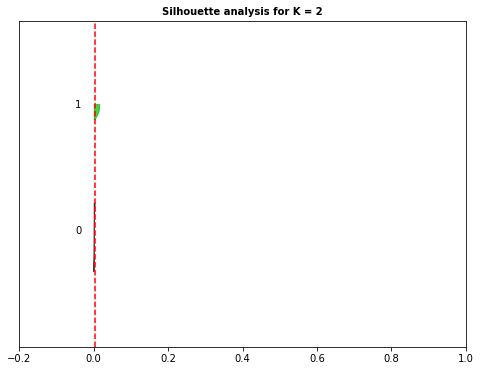

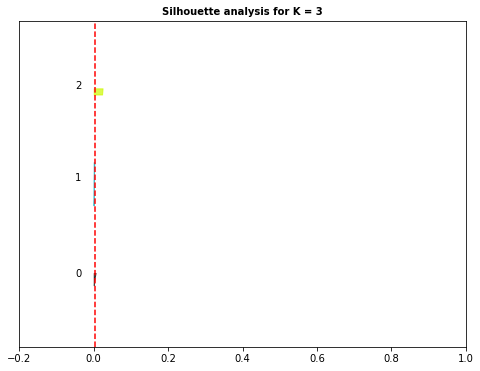

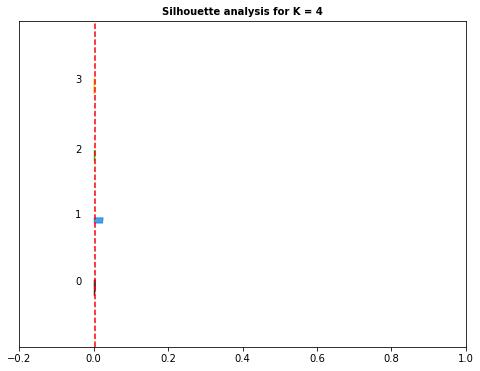

In [102]:
silhouette(kmeans_results, final_df, plot=True)

In [103]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

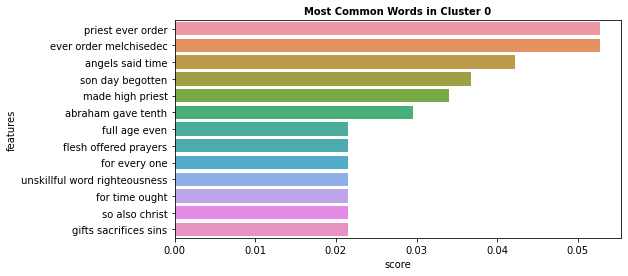

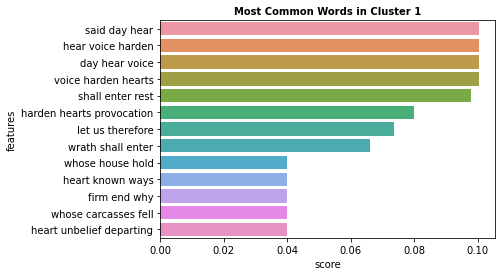

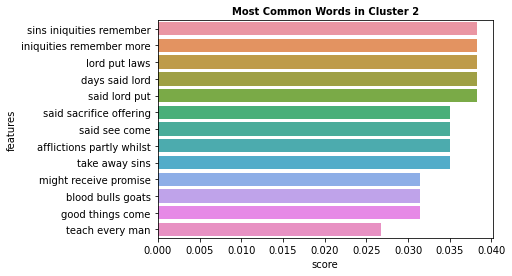

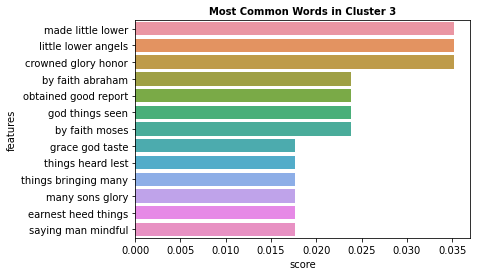

In [104]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [105]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

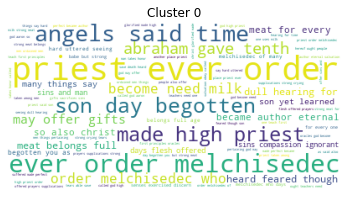

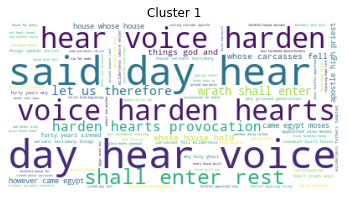

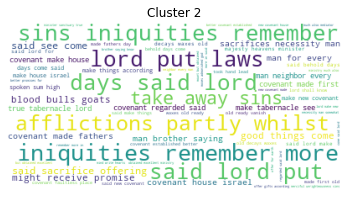

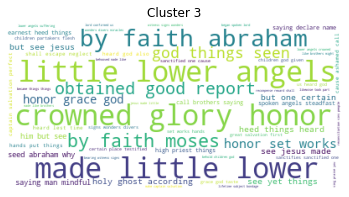

In [106]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [107]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Hebreus_1,"'god', ',', 'sundry', 'times', 'divers', 'mann...",0
101,Hebreus_2,"'therefore', 'ought', 'give', 'earnest', 'heed...",3
102,Hebreus_3,"',', 'holy', 'brothers', ',', 'partakers', 'he...",1
103,Hebreus_4,"'let', 'us', 'therefore', 'fear', ',', 'lest',...",1
104,Hebreus_5,"'every', 'high', 'priest', 'taken', 'among', '...",0


In [108]:
print(df)

          Autor                                              Livro  label
100   Hebreus_1  'god', ',', 'sundry', 'times', 'divers', 'mann...      0
101   Hebreus_2  'therefore', 'ought', 'give', 'earnest', 'heed...      3
102   Hebreus_3  ',', 'holy', 'brothers', ',', 'partakers', 'he...      1
103   Hebreus_4  'let', 'us', 'therefore', 'fear', ',', 'lest',...      1
104   Hebreus_5  'every', 'high', 'priest', 'taken', 'among', '...      0
105   Hebreus_6  'therefore', 'leaving', 'principles', 'doctrin...      0
106   Hebreus_7  'melchisedec', ',', 'king', 'salem', ',', 'pri...      0
107   Hebreus_8  'things', 'spoken', 'sum', ':', 'high', 'pries...      2
108   Hebreus_9  'truly', 'first', 'covenant', 'also', 'ordinan...      2
109  Hebreus_10  'law', 'shadow', 'good', 'things', 'come', ','...      2
110  Hebreus_11  'faith', 'substance', 'things', 'hoped', ',', ...      3
111  Hebreus_12  'seeing', 'also', 'compassed', 'great', 'cloud...      3
112  Hebreus_13  'let', 'brotherly', '